<a href="https://colab.research.google.com/github/SivaBharadwaj/UTA/blob/main/ExtraaLearn_LowCode_(4)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project
***Marks: 60***

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated regularly, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interact with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about the program through email, Representative shared information with a lead like a brochure of program, etc 
    * Phone Activity: Had a Phone Conversation with a representative, Had conversation over SMS with a representative, etc
    * Website Activity: Interacted on live chat with a representative, Updated profile on the website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

In [3]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Import Dataset

In [8]:
from google.colab import files
uploaded = files.upload()
import io
learn = pd.read_csv(io.BytesIO(uploaded['ExtraaLearn.csv']))

#learn = pd.read_csv("ExtraaLearn.csv") ##  Complete the code to read the data

Saving ExtraaLearn.csv to ExtraaLearn.csv


In [9]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

### View the first and last 5 rows of the dataset

In [10]:
data.head ##  Complete the code to view top 5 rows of the data

<bound method NDFrame.head of            ID  age current_occupation first_interaction profile_completed  \
0      EXT001   57         Unemployed           Website              High   
1      EXT002   56       Professional        Mobile App            Medium   
2      EXT003   52       Professional           Website            Medium   
3      EXT004   53         Unemployed           Website              High   
4      EXT005   23            Student           Website              High   
...       ...  ...                ...               ...               ...   
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  

In [11]:
data.tail ##  Complete the code to view last 5 rows of the data  

<bound method NDFrame.tail of            ID  age current_occupation first_interaction profile_completed  \
0      EXT001   57         Unemployed           Website              High   
1      EXT002   56       Professional        Mobile App            Medium   
2      EXT003   52       Professional           Website            Medium   
3      EXT004   53         Unemployed           Website              High   
4      EXT005   23            Student           Website              High   
...       ...  ...                ...               ...               ...   
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  

### Understand the shape of the dataset

In [12]:
data.shape ## Complete the code to get the shape of data

(4612, 15)

### Check the data types of the columns for the dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [14]:
# checking for duplicate values
data.duplicated().sum() ## Complete the code to check duplicate entries in the data

0

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [15]:
data.describe().T ##  Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


In [16]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
--------------------------------------------------
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------

In [ ]:
# checking the number of unique values
data["ID"]. # Complete the code to check the number of unique values

In [18]:
data.drop(["ID"], axis=1, inplace=True) # Complete the code to drop "ID" column from data

In [19]:
data.head

<bound method NDFrame.head of       age current_occupation first_interaction profile_completed  \
0      57         Unemployed           Website              High   
1      56       Professional        Mobile App            Medium   
2      52       Professional           Website            Medium   
3      53         Unemployed           Website              High   
4      23            Student           Website              High   
...   ...                ...               ...               ...   
4607   35         Unemployed        Mobile App            Medium   
4608   55       Professional        Mobile App            Medium   
4609   58       Professional           Website              High   
4610   57       Professional        Mobile App            Medium   
4611   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  page_views_per_visit  \
0                  7                   1639               1.86100   
1              

### Univariate Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on age

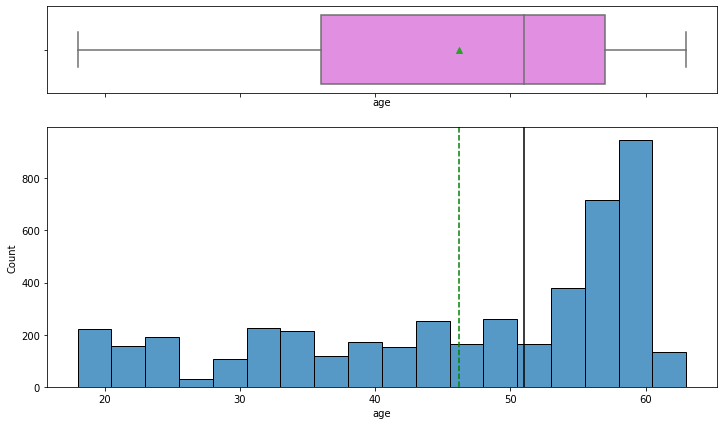

In [20]:
histogram_boxplot(data, "age") 



1.   Distribution of the age is left skewed with no outliers
2.   High number of leads are aged > 50



### Observations on website_visits

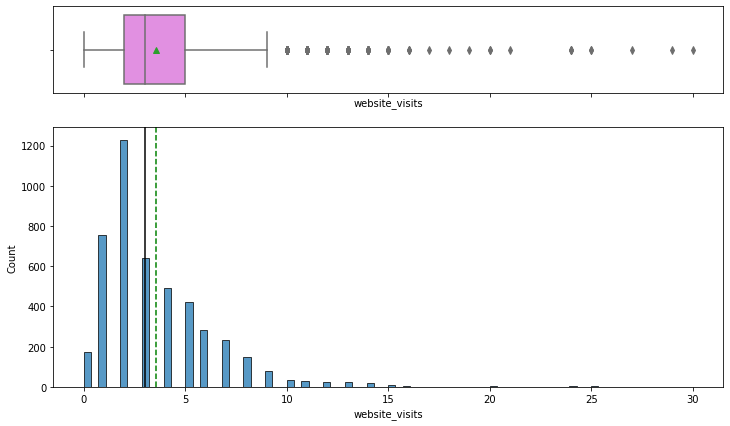

In [22]:
histogram_boxplot(data, "website_visits") # Complete the code to plot a histogram_boxplot for website_visits




1.   The website visits are slighlty right skewed with outliers
2.   There are lot of outliers with website visits greater than 10
3.   Most of the leads visited the website less than 5 times



In [23]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

### Observations on number of time_spent_on_website

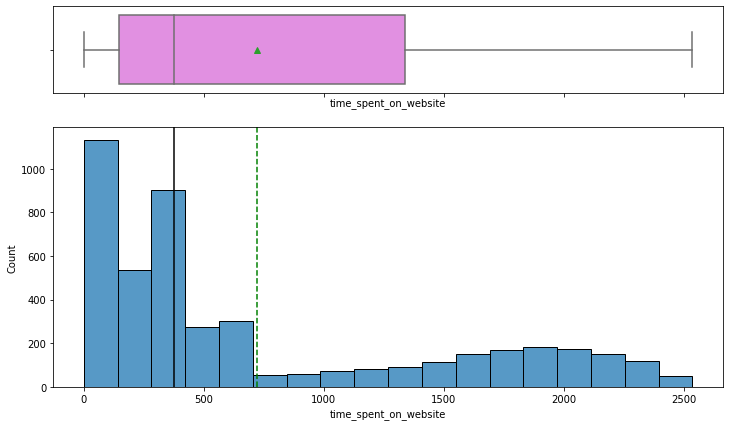

In [24]:
histogram_boxplot(data,"time_spent_on_website") # Complete the code to plot a histogram_boxplot for time_spent_on_website




1.   Time spent on the website is heavily skewed to right with no outliers
2.   Most of the leads similar to the number of website visits have spent less than 500 seconds, i.e., many have spent lesser amount of time on the website with lesser numbre of visits



### Observations on number of page_views_per_visit

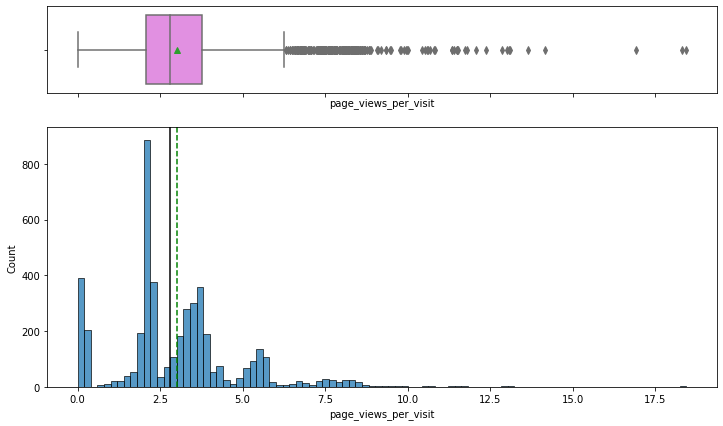

In [26]:
histogram_boxplot(data,"page_views_per_visit") # Complete the code to plot a histogram_boxplot for page_views_per_visit


In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on current_occupation

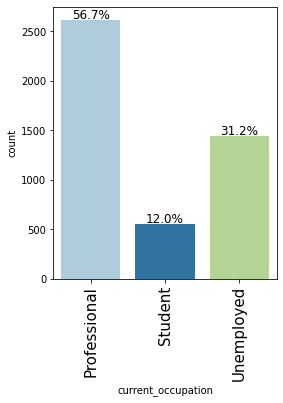

In [28]:
labeled_barplot(data, "current_occupation", perc=True)

### Observations on number of first_interaction

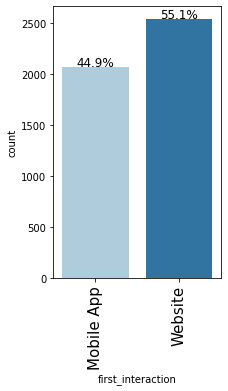

In [29]:
labeled_barplot(data, "first_interaction", perc=True) # Complete the code to plot labeled_barplot for first_interaction

### Observations on profile_completed

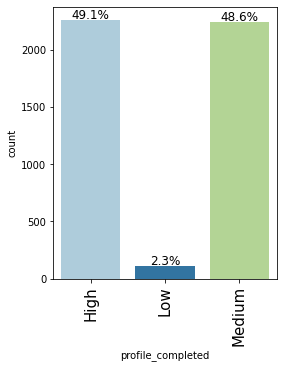

In [31]:
labeled_barplot(data, "profile_completed", perc=True) # Complete the code to plot labeled_barplot for profile_completed

### Observations on last_activity

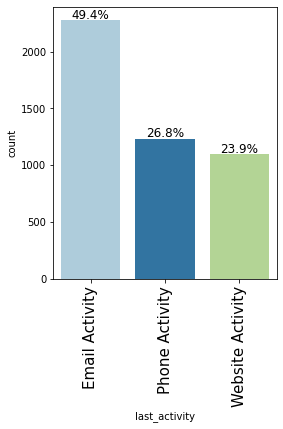

In [32]:
labeled_barplot(data,"last_activity", perc=True) # Complete the code to plot labeled_barplot for last_activity

### Observations on print_media_type1

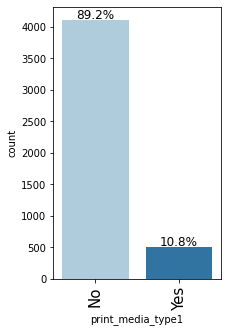

In [33]:
labeled_barplot(data, "print_media_type1", perc=True) # Complete the code to plot labeled_barplot for print_media_type1

### Observations on print_media_type2

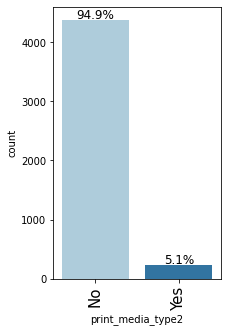

In [34]:
labeled_barplot(data,"print_media_type2", perc=True) # Complete the code to plot labeled_barplot for print_media_type2

### Observations on digital_media

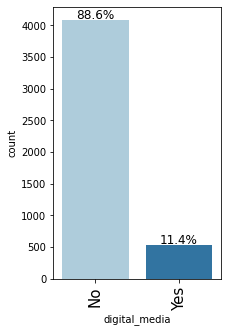

In [35]:
labeled_barplot(data,"digital_media", perc=True) # Complete the code to plot labeled_barplot for digital_media

### Observations on educational_channels

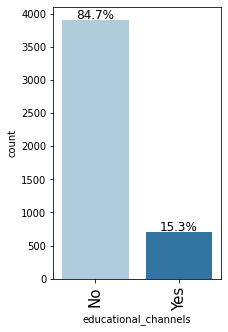

In [36]:
labeled_barplot(data,"educational_channels", perc=True) # Complete the code to plot labeled_barplot for educational_channels

### Observations on referral

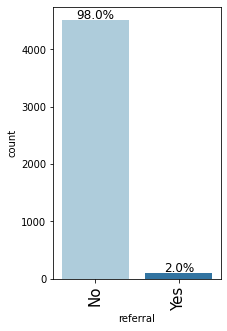

In [37]:
labeled_barplot(data,"referral", perc=True) # Complete the code to plot labeled_barplot for referral

### Observations on status

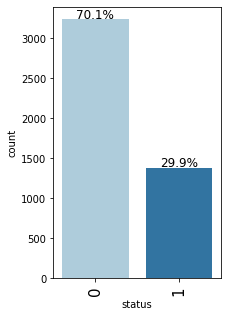

In [39]:
labeled_barplot(data,"status", perc=True) # Complete the code to plot labeled_barplot for status

### Bivariate Analysis

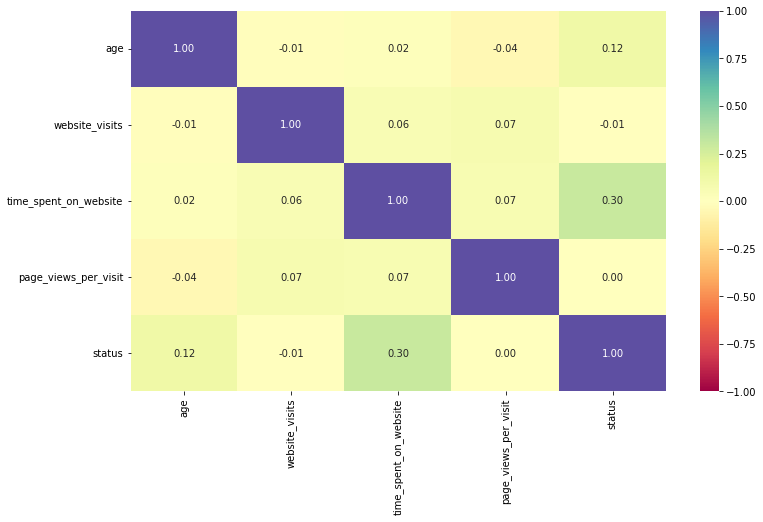

In [40]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [41]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [42]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


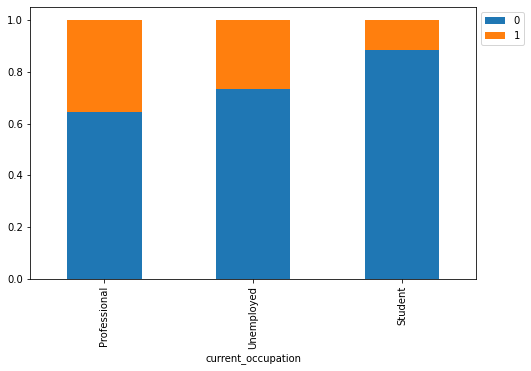

In [43]:
stacked_barplot(data, "current_occupation", "status")

**Age can be a good factor to differentiate between such leads**

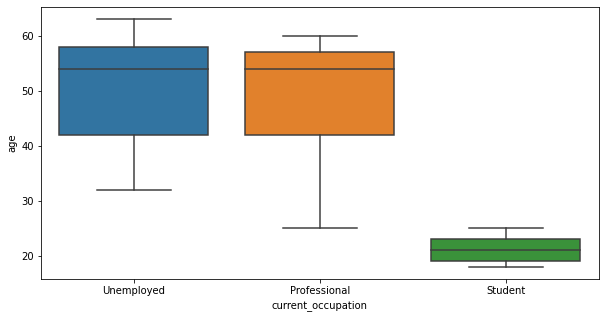

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["current_occupation"], data["age"])
plt.show()

In [45]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


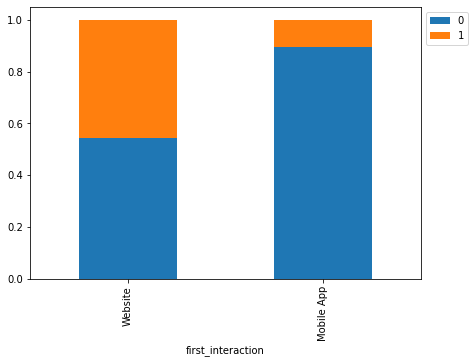

In [47]:
stacked_barplot(data,"first_interaction", "status") # Complete the code to plot stacked_barplot for first_interaction and status

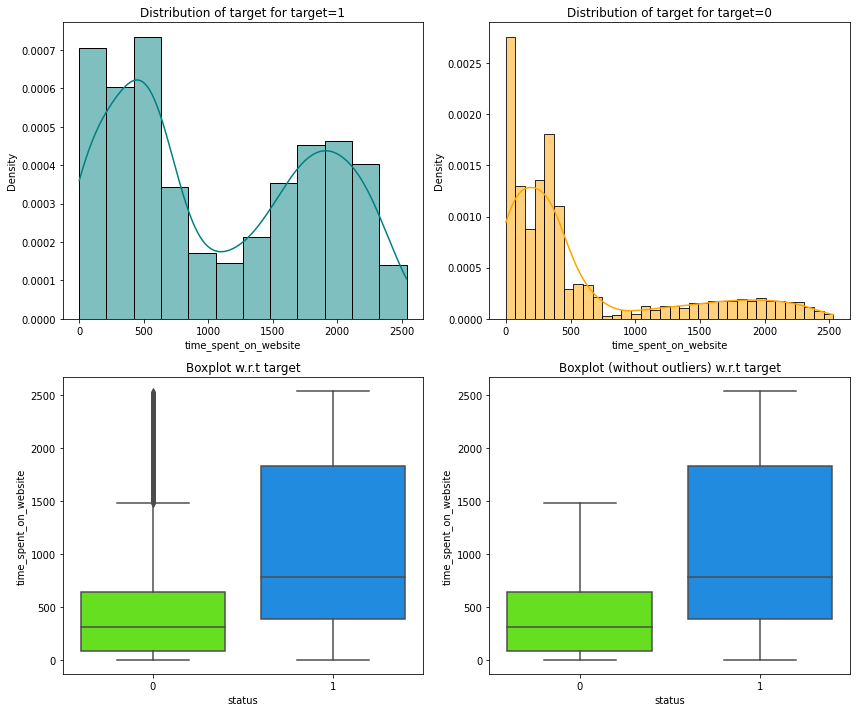

In [49]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [48]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

**Let's do a similar analysis for time spent on website and page views per visit.**

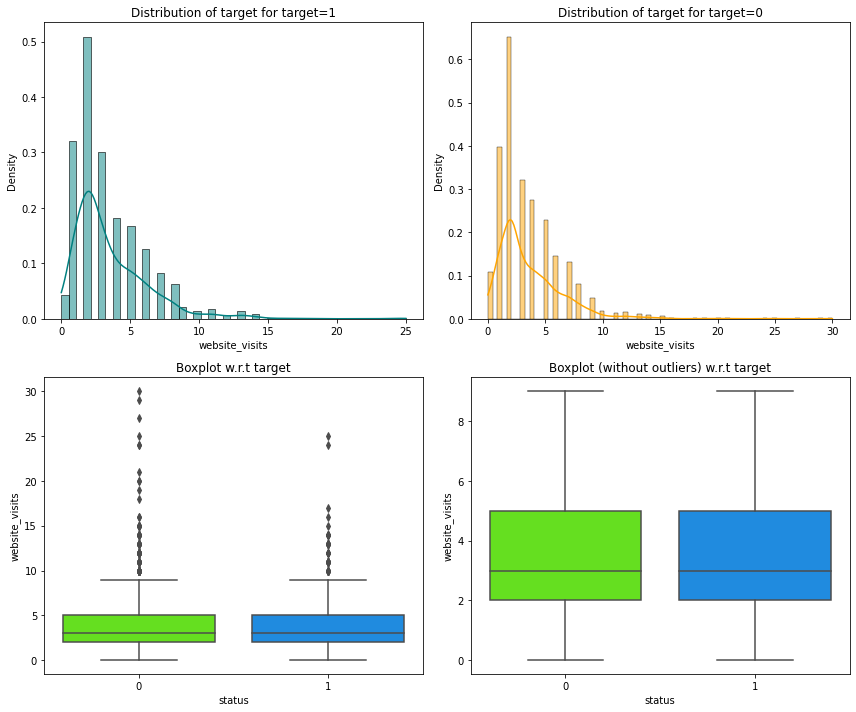

In [50]:
distribution_plot_wrt_target(data, "website_visits", "status") # Complete the code to plot distribution for website_visits and status

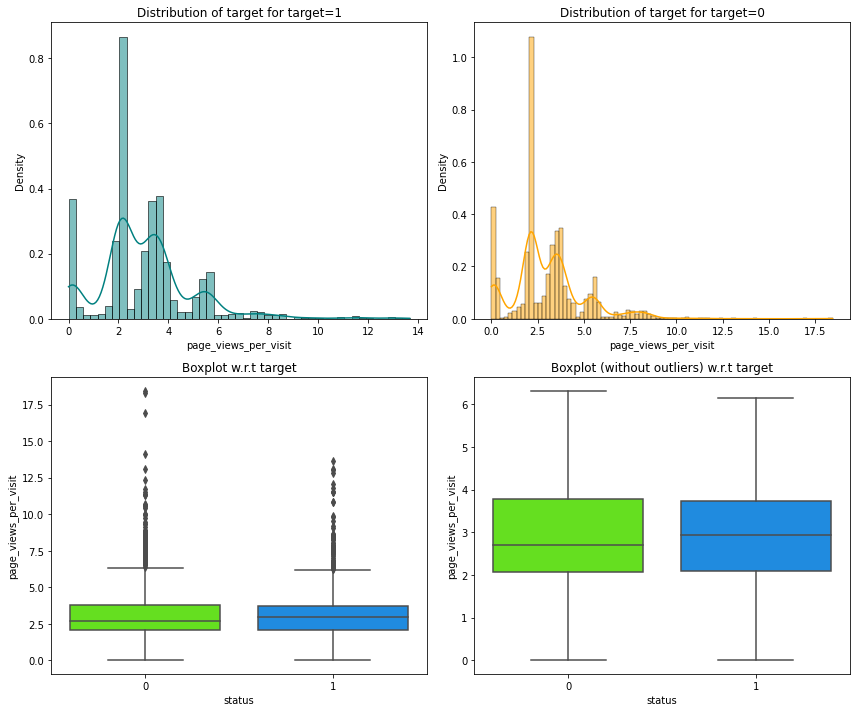

In [51]:
distribution_plot_wrt_target(data,"page_views_per_visit", "status") # Complete the code to plot distribution for page_views_per_visit and status

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


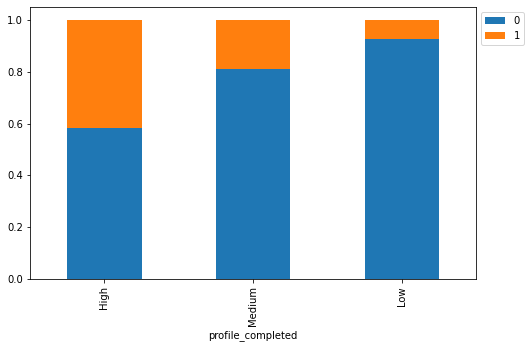

In [52]:
stacked_barplot(data, "profile_completed", "status")  # Complete the code to plot stacked_barplot for profile_completed and status

**After a lead shares their information by creating a profile, there may be interactions between the lead and the company to proceed with the process of enrollment. Let's see how the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


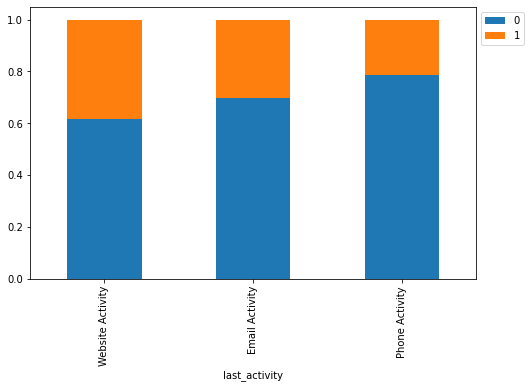

In [53]:
stacked_barplot(data, "last_activity", "status") # Complete the code to plot stacked_barplot for last_activity and status

**Let's see how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


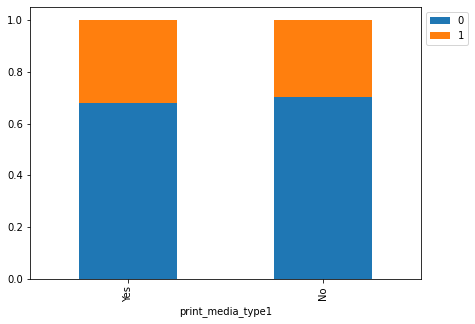

In [55]:
stacked_barplot(data, "print_media_type1", "status") # Complete the code to plot stacked_barplot for print_media_type1 and status

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


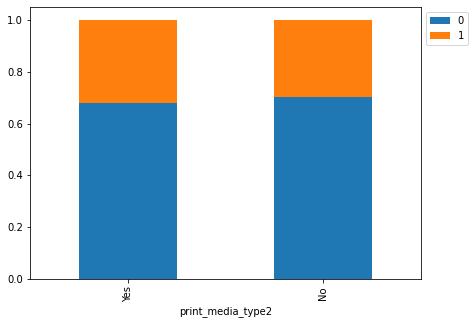

In [56]:
stacked_barplot(data,"print_media_type2", "status") # Complete the code to plot stacked_barplot for print_media_type2 and status

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


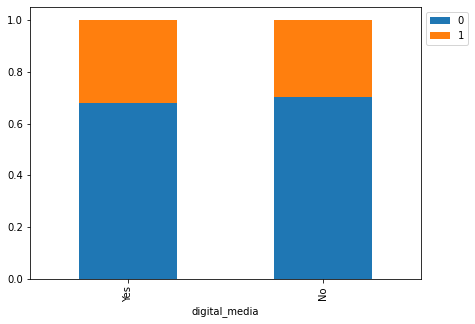

In [58]:
stacked_barplot(data, "digital_media", "status") # Complete the code to plot stacked_barplot for digital_media and status

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


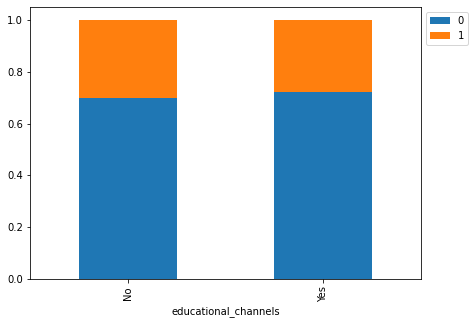

In [59]:
stacked_barplot(data,"educational_channels", "status") # Complete the code to plot stacked_barplot for educational_channels and status

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


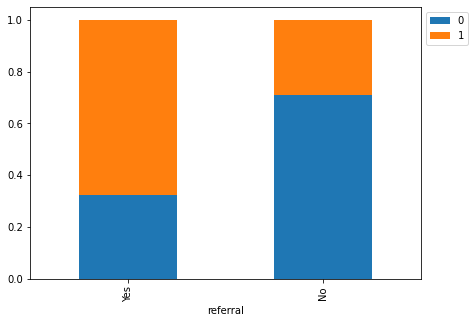

In [60]:
stacked_barplot(data, "referral","status") # Complete the code to plot stacked_barplot for referral and status

### Outlier Check

- Let's check for outliers in the data.

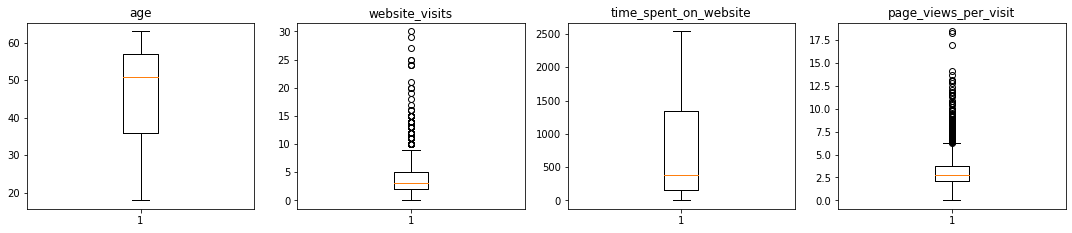

In [61]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [62]:
X = data.drop(["status"], axis=1)
Y =data["status"] # Complete the code to define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True) # Complete the code to get dummies for X

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [63]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a lead will not be converted to a paid customer in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer in reality, the lead would not have converted to a paid customer. 

### Which case is more important? 

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer. 

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss.

### How to reduce the losses?

* Company would want `Recall` to be maximized, greater the Recall score higher are the chances of minimizing False Negatives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [64]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [65]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with statsmodels library)

In [66]:
X = data.drop(["status"], axis=1)
Y = data["status"]

# adding constant
X = sm.add_constant(X) ## Complete the code to add constant to X 

X = pd.get_dummies(X, drop_first=True) ## Complete the code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

In [67]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary()) # Complete the code to get model summary

                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 3228
Model:                          Logit   Df Residuals:                     3211
Method:                           MLE   Df Model:                           16
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                  0.3589
Time:                        13:05:22   Log-Likelihood:                -1256.8
converged:                       True   LL-Null:                       -1960.4
Covariance Type:            nonrobust   LLR p-value:                4.576e-290
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.3415      0.309     -7.580      0.000      -2.947      -1.736
age                               -0.0023      0.005     -0.443      0.

In [68]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.82776,0.66178,0.73064,0.69451


### Multicollinearity

In [69]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [70]:
checking_vif(X_train)

,feature,VIF
0,const,38.00376
1,age,1.97547
2,website_visits,1.01606
3,time_spent_on_website,1.02318
4,page_views_per_visit,1.01711
5,current_occupation_Student,2.02624
6,current_occupation_Unemployed,1.07083
7,first_interaction_Website,1.00842
8,profile_completed_Low,1.03701
9,profile_completed_Medium,1.02992


### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [71]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'time_spent_on_website', 'current_occupation_Student', 'current_occupation_Unemployed', 'first_interaction_Website', 'profile_completed_Low', 'profile_completed_Medium', 'last_activity_Phone Activity', 'last_activity_Website Activity', 'print_media_type2_Yes', 'referral_Yes']


In [72]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [73]:
logit1 = sm.Logit(y_train, X_train1.astype(float))## Complete the code to train logistic regression on X_train1 and y_train
lg1 = logit1.fit(disp=False) ## Complete the code to fit logistic regression
print(lg1.summary()) ## Complete the code to print summary of the model

                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 3228
Model:                          Logit   Df Residuals:                     3217
Method:                           MLE   Df Model:                           10
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                  0.3576
Time:                        13:12:08   Log-Likelihood:                -1259.3
converged:                       True   LL-Null:                       -1960.4
Covariance Type:            nonrobust   LLR p-value:                3.443e-295
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.4977      0.141    -17.732      0.000      -2.774      -2.222
time_spent_on_website              0.0012   7.06e-05     17.546      0.

In [74]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.82714,0.65969,0.73001,0.69307


###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [75]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,time_spent_on_website,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type2_Yes,referral_Yes
Odds,0.08227,1.00124,0.11744,0.55554,15.14700,0.08428,0.17184,0.49833,1.58873,1.58662,4.95606
Change_odd%,-91.77267,0.12387,-88.25648,-44.44627,1414.70043,-91.57176,-82.81597,-50.16732,58.87331,58.66203,395.60635


#### Checking model performance on the training set

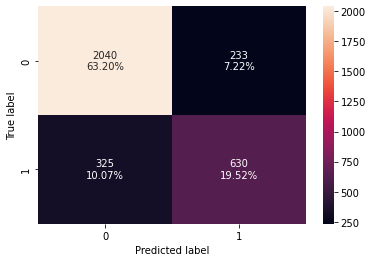

In [76]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [77]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.82714,0.65969,0.73001,0.69307


#### ROC-AUC
* ROC-AUC on training set

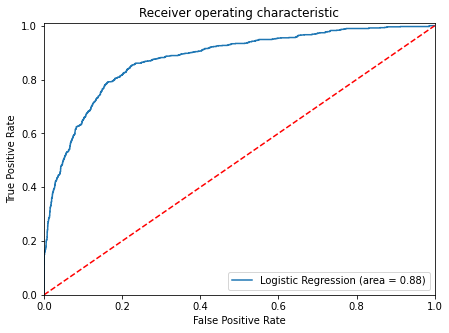

In [78]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [79]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.262190748827827


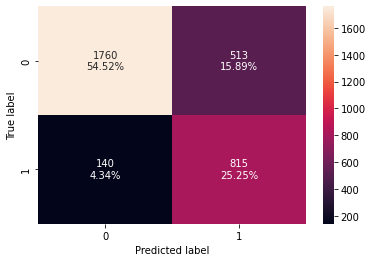

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(
     lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc 
) ## Complete the code to create the confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold 

In [94]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79771,0.85340,0.61370,0.71397


#### Let's use Precision-Recall curve and see if we can find a better threshold

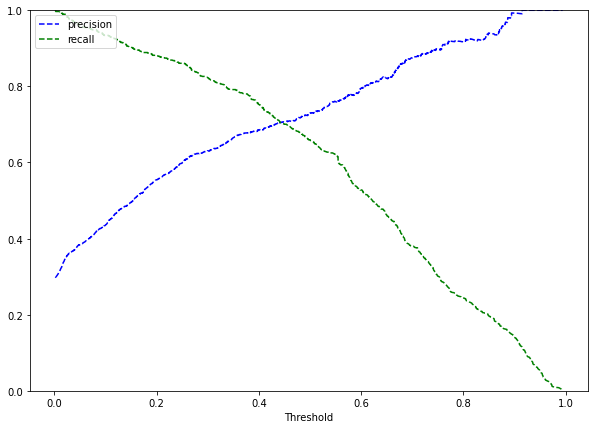

In [81]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [82]:
# setting the threshold
optimal_threshold_curve = 0.38

#### Checking model performance on training set

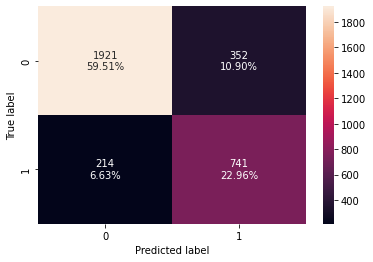

In [83]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
) ## Complete the code to create the confusion matrix for X_train1 and y_train with optimal_threshold_curve as threshold 

In [84]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.82466,0.77592,0.67795,0.72363


### Let's check the performance on the test set

**Using model with default threshold**

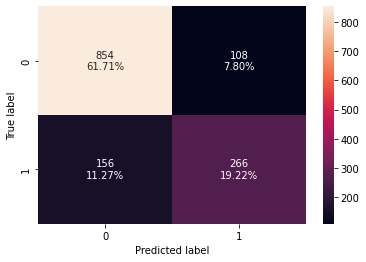

In [85]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test) ## Complete the code to create confusion matrix for X_test1 and y_test

In [86]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test) ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf 

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80925,0.63033,0.71123,0.66834


* ROC curve on test set

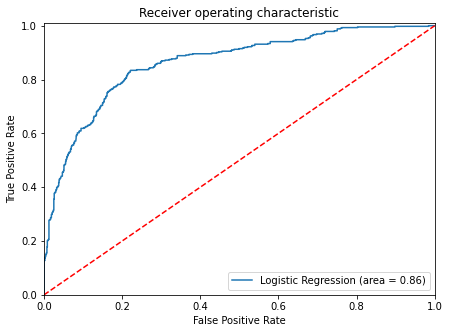

In [87]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.26** 

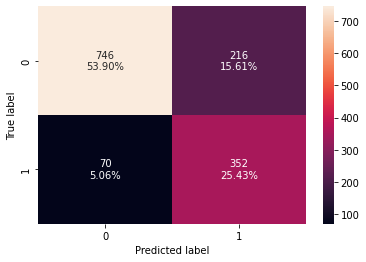

In [88]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc) ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_auc_roc as threshold

In [89]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79335,0.83412,0.61972,0.71111


**Using model with threshold = 0.38**

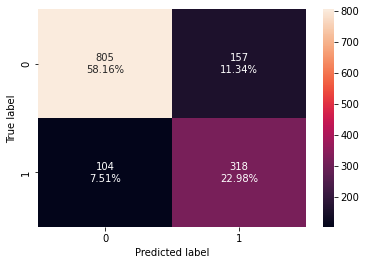

In [90]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve) ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_curve as threshold

In [91]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.81142,0.75355,0.66947,0.70903


### Model performance summary

In [95]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.82714,0.79771,0.82466
Recall,0.65969,0.85340,0.77592
Precision,0.73001,0.61370,0.67795
F1,0.69307,0.71397,0.72363


In [ ]:
# test performance comparison

'_______' ## Complete the code to compare test performance 

## Decision Tree

In [97]:
X = data.drop(["status"], axis=1)
Y = data["status"]

X = pd.get_dummies(X, drop_first=True) ## Complete the code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [98]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [99]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Decision Tree Model

In [100]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train) ## Complete the code to fit decision tree on train data

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

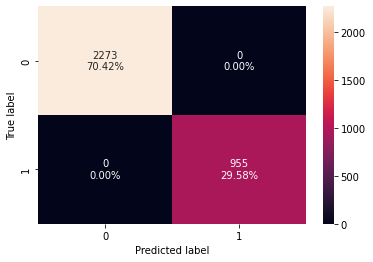

In [129]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [130]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


#### Checking model performance on test set

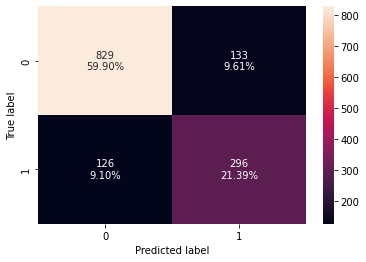

In [131]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [132]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test set
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.81286,0.70142,0.68998,0.69565


**Before pruning the tree let's check the important features.**

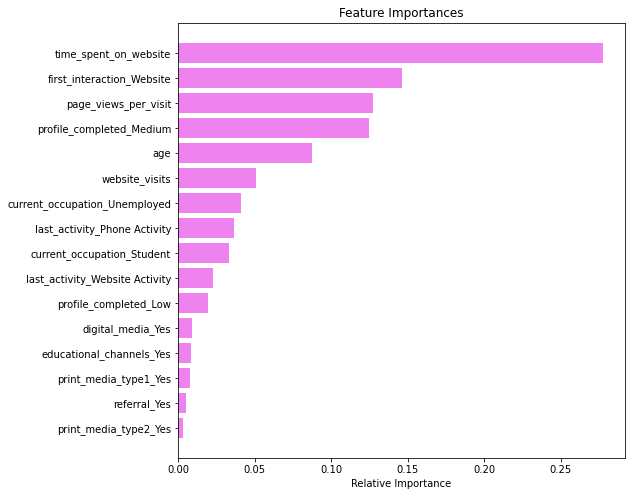

In [133]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Pruning the tree

**Pre-Pruning**

In [134]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],
    "min_samples_split": [2, 5, 7, 10, 20, 30],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=7,
                       max_leaf_nodes=20, random_state=1)

#### Checking performance on training set

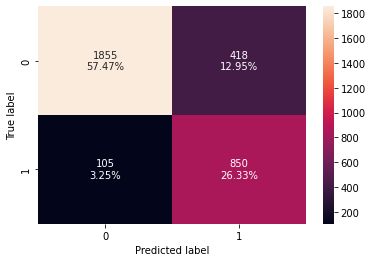

In [135]:
confusion_matrix_sklearn(estimator, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [136]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## Complete the code to check performance on train set
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83798,0.89005,0.67035,0.76473


#### Checking performance on test set

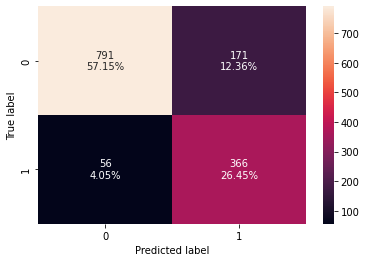

In [137]:
confusion_matrix_sklearn(estimator, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [138]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) ## Complete the code to check performance on test set
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83598,0.86730,0.68156,0.76330


### Visualizing the Decision Tree

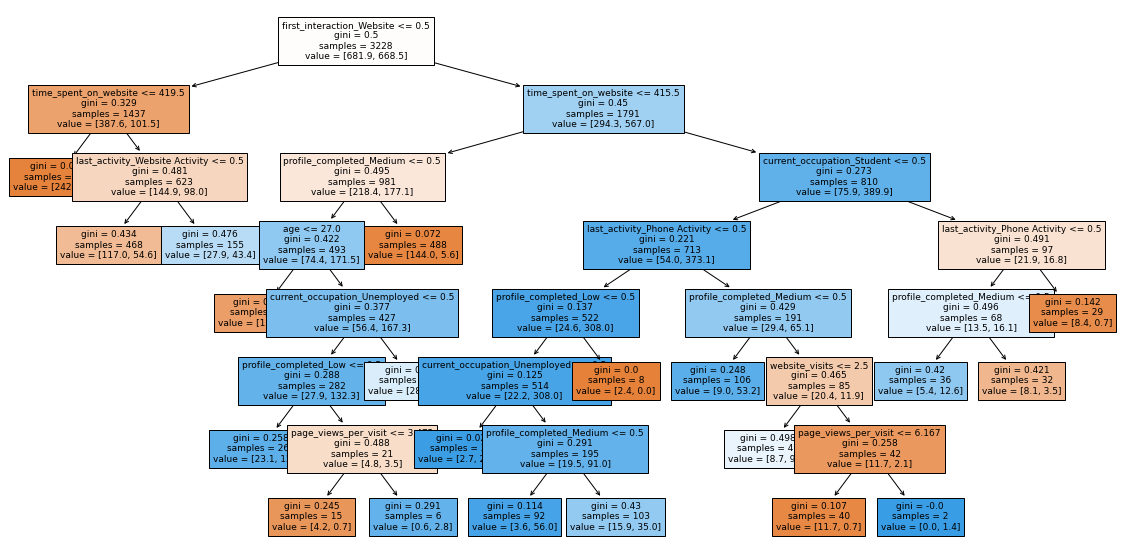

In [139]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [140]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- weights: [242.70, 3.50] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- weights: [117.00, 54.60] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- weights: [27.90, 43.40] class: 1
|--- first_interaction_Website >  0.50
|   |--- time_spent_on_website <= 415.50
|   |   |--- profile_completed_Medium <= 0.50
|   |   |   |--- age <= 27.00
|   |   |   |   |--- weights: [18.00, 4.20] class: 0
|   |   |   |--- age >  27.00
|   |   |   |   |--- current_occupation_Unemployed <= 0.50
|   |   |   |   |   |--- profile_completed_Low <= 0.50
|   |   |   |   |   |   |--- weights: [23.10, 128.80] class: 1
|   |   |   |   |   |--- profile_completed_Low >  0.50
|   |   |   |   |   |   |--- page_views_per_visit <= 3.47
|   |   |   |   |   |   |   |--- weights: [4.20, 0.70] class: 0
|   |   |   |   |   |   |--- page_v

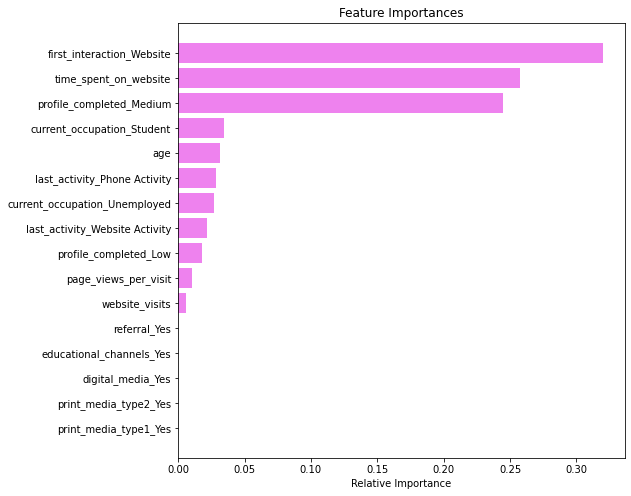

In [141]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Cost Complexity Pruning**

In [142]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [143]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00000
1,0.00018,0.00055
2,0.00019,0.00168
3,0.00020,0.00228
4,0.00020,0.00288
5,0.00020,0.00348
6,0.00020,0.00409
7,0.00021,0.00533
8,0.00021,0.00574
9,0.00021,0.00615


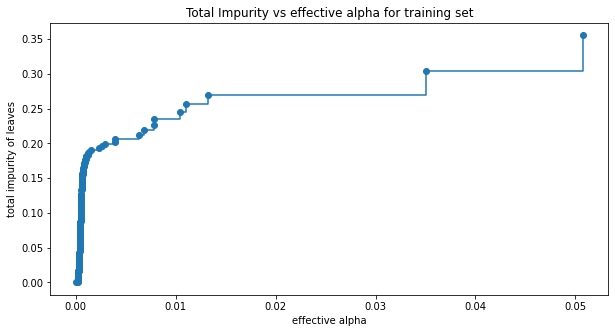

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [145]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train) ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.060983400606085925


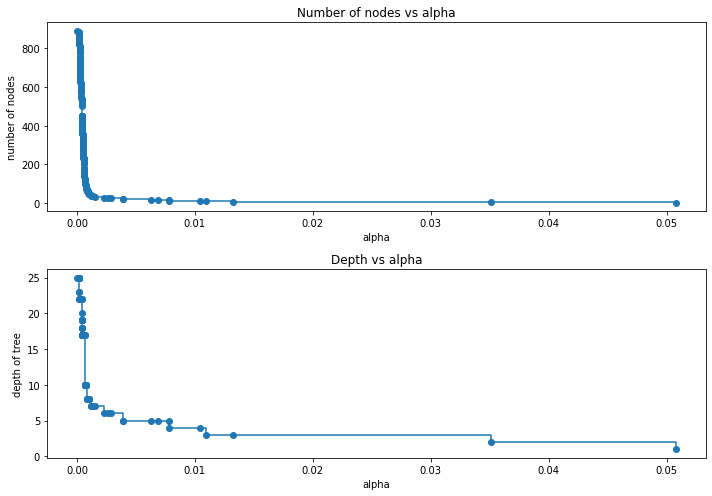

In [146]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall Score vs alpha for training and testing sets

In [147]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

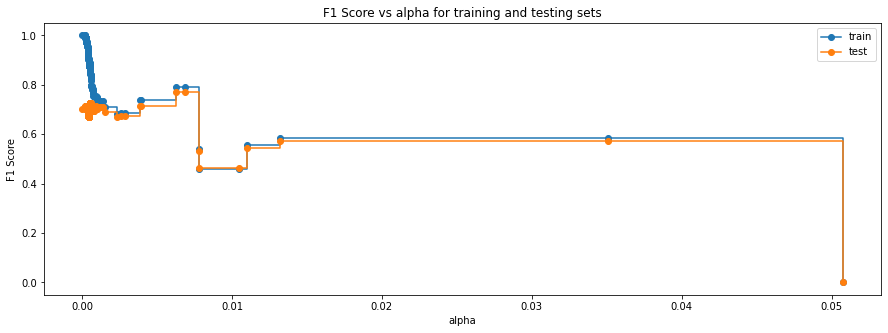

In [148]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [149]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00628175858280601, random_state=1)


#### Checking performance on training set

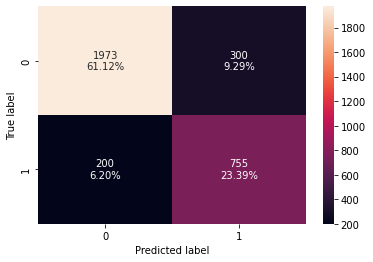

In [150]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [151]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.84511,0.79058,0.71564,0.75124


#### Checking performance on test set

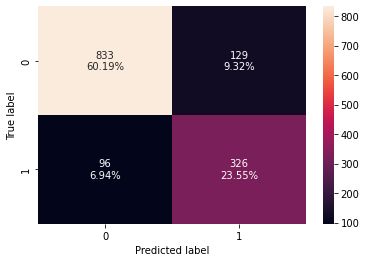

In [152]:
confusion_matrix_sklearn(best_model, X_test, y_test) ## Complete the code to create confusion matrix for test data on best model


In [153]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.83743,0.77251,0.71648,0.74344


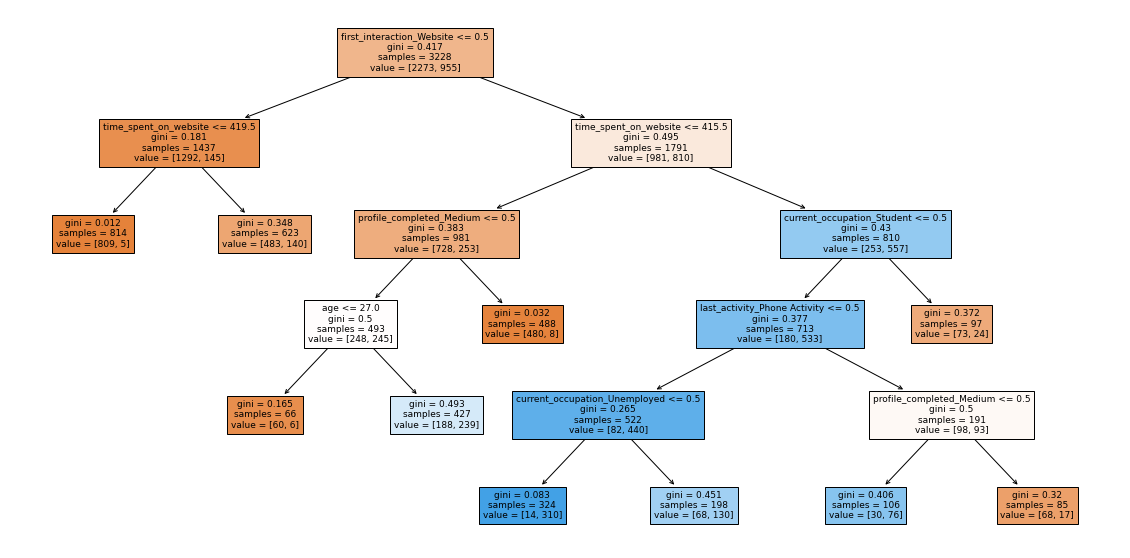

In [154]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [155]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- weights: [809.00, 5.00] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- weights: [483.00, 140.00] class: 0
|--- first_interaction_Website >  0.50
|   |--- time_spent_on_website <= 415.50
|   |   |--- profile_completed_Medium <= 0.50
|   |   |   |--- age <= 27.00
|   |   |   |   |--- weights: [60.00, 6.00] class: 0
|   |   |   |--- age >  27.00
|   |   |   |   |--- weights: [188.00, 239.00] class: 1
|   |   |--- profile_completed_Medium >  0.50
|   |   |   |--- weights: [480.00, 8.00] class: 0
|   |--- time_spent_on_website >  415.50
|   |   |--- current_occupation_Student <= 0.50
|   |   |   |--- last_activity_Phone Activity <= 0.50
|   |   |   |   |--- current_occupation_Unemployed <= 0.50
|   |   |   |   |   |--- weights: [14.00, 310.00] class: 1
|   |   |   |   |--- current_occupation_Unemployed >  0.50
|   |   |   |   |   |--- weights: [68.00, 130.00] class: 1
|   |   |   |--

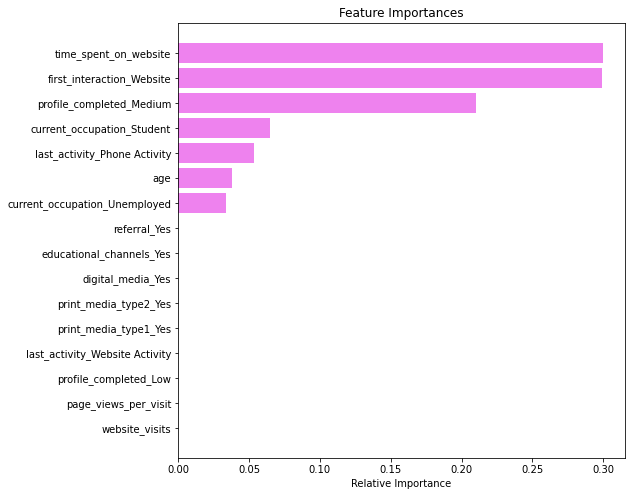

In [156]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing Decision Tree models

In [157]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00000,0.83798,0.84511
Recall,1.00000,0.89005,0.79058
Precision,1.00000,0.67035,0.71564
F1,1.00000,0.76473,0.75124


In [158]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df
 ## Complete the code to compare performance of test set

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.81286,0.83598,0.83743
Recall,0.70142,0.86730,0.77251
Precision,0.68998,0.68156,0.71648
F1,0.69565,0.76330,0.74344


### Business Recommendations